# Visualizing Gender Gaps in College Degrees

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website.

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

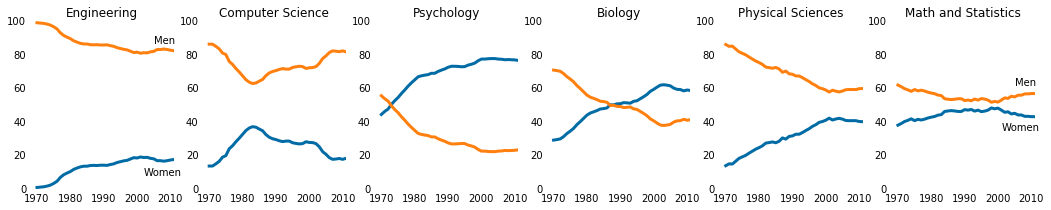

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

We want to display the charts for all degrees, ordered by categories (STEM, lib_arts and other degrees) in columns.

In [97]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# We append an blank element to lib_arts_cats to make it the same size as the others.
lib_arts_cats.append('')

We zip the three lists together and flatten the result.

In [98]:
import itertools
all_cats = [ item for item in zip(stem_cats, lib_arts_cats, other_cats)]
all_cats = list(itertools.chain(*all_cats))
all_cats

['Psychology',
 'Foreign Languages',
 'Health Professions',
 'Biology',
 'English',
 'Public Administration',
 'Math and Statistics',
 'Communications and Journalism',
 'Education',
 'Physical Sciences',
 'Art and Performance',
 'Agriculture',
 'Computer Science',
 'Social Sciences and History',
 'Business',
 'Engineering',
 '',
 'Architecture']

Now we can generate the plots using all_cats.  The order in which the degrees appear will render the charts in the required way.

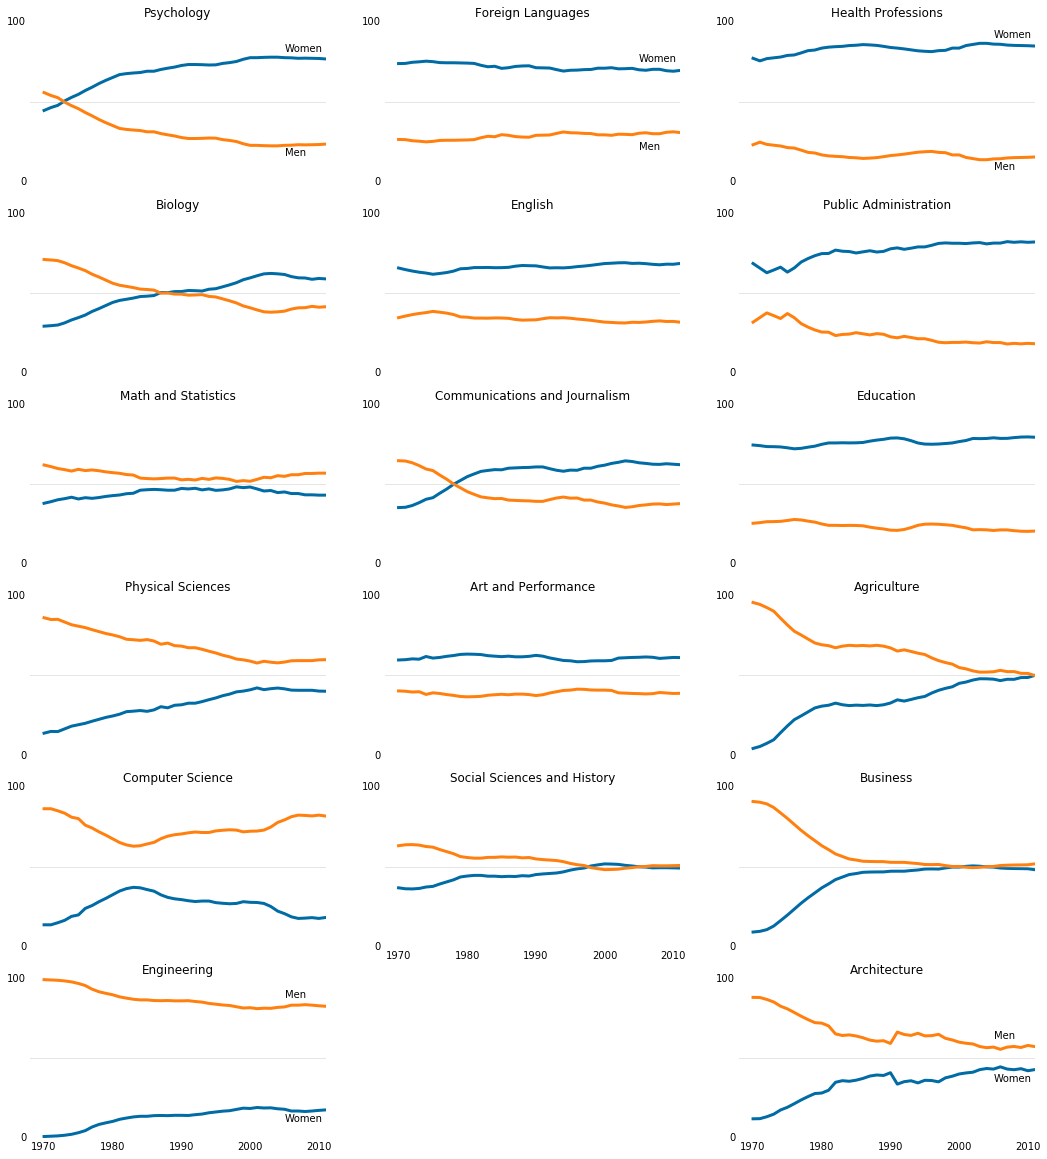

In [100]:
fig = plt.figure(figsize=(18, 20))

for sp in range(0,17):
    if all_cats[sp] == '':
        sp +=1
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[all_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[all_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(all_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

    if sp == 0:
        ax.text(2005, 81, 'Women')
        ax.text(2005, 16, 'Men')
    elif sp == 1:
        ax.text(2005, 75, 'Women')
        ax.text(2005, 20, 'Men')
    elif sp == 2:
        ax.text(2005, 90, 'Women')
        ax.text(2005, 7, 'Men')
    elif sp == 13:
        ax.tick_params(labelbottom='on')
    elif sp == 15:
        ax.tick_params(labelbottom='on')
        ax.text(2005, 88, 'Men')
        ax.text(2005, 10, 'Women')
    elif sp == 17:
        ax.tick_params(labelbottom='on')
        ax.text(2005, 62, 'Men')
        ax.text(2005, 35, 'Women')
plt.savefig('gender_degrees.png')
plt.show()